# Άσκηση

Στην άσκηση αυτή θέλουμε να φτιάξουμε ένα πολυεπίπεδο νευρωνικό δίκτυο με 5 επίπεδα (4 κρυφά και 1 επίπεδο εξόδου). Τα κρυφά επίπεδα θα επιλέξουμε να έχουν 200, 100, 60 και 30 νευρώνες αντίστοιχα και [σιγμοειδή](https://en.wikipedia.org/wiki/Sigmoid_function) συνάρτηση ενεργοποίησης. Το επίπεδο εξόδου θα έχει συνάρτηση ενεργοποίησης τη [softmax](https://en.wikipedia.org/wiki/Softmax_function). Θα χρησιμοποιήσουμε την [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy) ως συνάρτηση κόστους και έναν απλό [Mini-Batch Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) optimizer.

Η τελική αρχιτεκτονική φαίνεται στο παρακάτω σχήμα:

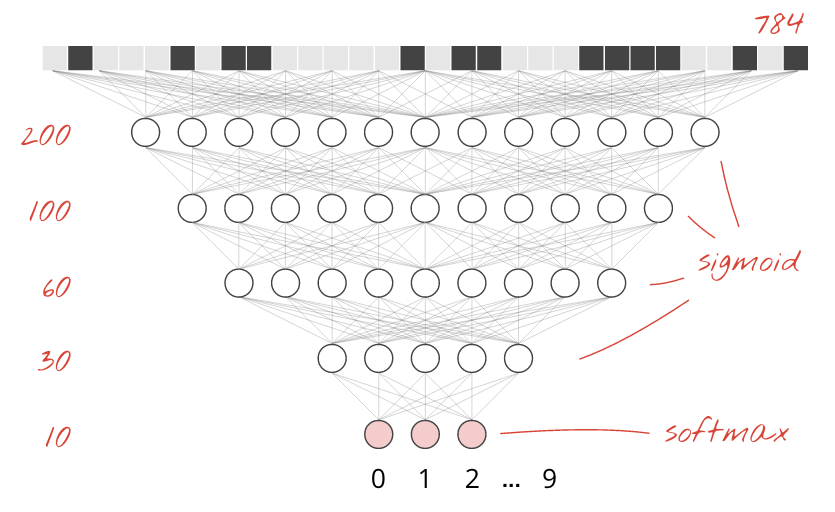

Σημείωση: για $batch \: size = 64$ κάθε 500 βήματα χρειάζονται περίπου 1 λεπτό.

In [1]:
!pip install --upgrade tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import time
%matplotlib inline

Requirement already up-to-date: tensorflow in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s8ec-3d27bf98b08fe6-d16258105dbb/.local/lib/python2.7/site-packages
Requirement already up-to-date: numpy>=1.12.1 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s8ec-3d27bf98b08fe6-d16258105dbb/.local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: protobuf>=3.3.0 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s8ec-3d27bf98b08fe6-d16258105dbb/.local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: six>=1.10.0 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s8ec-3d27bf98b08fe6-d16258105dbb/.local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: enum34>=1.1.6 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s8ec-3d27bf98b08fe6-d16258105dbb/.local/lib/python2.7/site-packages (from tensorflow)
Requirement already up-to-date: backports.weakref>=1.0rc1 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s8ec-3d27

Κατασκευάστε το Νευρωνικό Δίκτυο που περιγράφεται παραπάνω και εκπαιδεύστε το για 5000 βήματα. Έπειτα απαντήστε στα παρακάτω ερωτήματα.

### Ερωτήματα:

- Πόσες παραμέτρους έχει συνολικά το Νευρωνικό Δίκτυο;
- Γιατί το accuracy του test set είναι μικρότερο από αυτό του tranining set;
- Γιατί το accuracy του training set παρουσιάζει μεγάλη διακύμανση;

In [2]:
# Φορτώνουμε τα δεδομένα
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Μεταβλητές δεδομένων εισόδου
x = tf.placeholder(tf.float32, shape=(None, 784)) # shape=(batch_size, image_pixels)
y = tf.placeholder(tf.float32, shape=(None, 10)) # shape=(batch_size, num_classes)

# Βάρη 1ου επιπέδου
W1 = tf.Variable(tf.truncated_normal((???, ???), stddev=0.1))
b1 = tf.Variable(tf.zeros((???)))

# Βάρη 2ου επιπέδου
W2 = tf.Variable(tf.truncated_normal((???,???), stddev=0.1))
b2 = tf.Variable(tf.zeros((???)))

# Βάρη 3ου επιπέδου
W3 = tf.Variable(tf.truncated_normal((???,???), stddev=0.1))
b3 = tf.Variable(tf.zeros((???)))

# Βάρη 4ου επιπέδου
W4 = tf.Variable(tf.truncated_normal((???,???), stddev=0.1))
b4 = tf.Variable(tf.zeros((???)))

# Βάρη 5ου επιπέδου
W5 = tf.Variable(tf.truncated_normal((???,???), stddev=0.1))
b5 = tf.Variable(tf.zeros((???)))

# Επίπεδα δικτύου
z1 = tf.sigmoid(???)
z2 = tf.sigmoid(???)
z3 = tf.sigmoid(???)
z4 = tf.sigmoid(???)
logits = ???
y_hat = tf.nn.softmax(logits)

# Συνάρτηση κόστους και βελτιστοποίηση
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Υπολογισμός accuracy
correct_pred = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
start_time = step_time = time.time()
batch_size = 64

with tf.Session() as sess:
    
    loss_tr, acc_tr, loss_ts, acc_ts = [], [], [], []
    
    sess.run(tf.global_variables_initializer()) # αρχικοποίηση μεταβλητών
    
    for step in range(1, 5001): # πόσα βήματα θέλουμε να κάνει ο αλγόριθμος
        
        
        x_batch, y_batch = mnist.train.next_batch(batch_size) # παίρνουμε ένα batch από τα training data του mnist. κάνει shuffle από μόνο του! 
        
        sess.run(???, feed_dict={x: x_batch, y: y_batch}) # τι πρέπει να τρέξουμε για να γίνει η εκπαίδευση;
        
        # Για τις γραφικές
        l_tr, a_tr = sess.run([cross_entropy, accuracy], feed_dict={x: x_batch, y: y_batch})
        l_ts, a_ts = sess.run([cross_entropy, accuracy], feed_dict={x: mnist.test.images, y: mnist.test.labels})
        loss_tr.append(l_tr)
        acc_tr.append(a_tr)
        loss_ts.append(l_ts)
        acc_ts.append(a_ts)
        
        if step % 500 == 0:
            print 'Step: {:>4}, Time: {:.2f} sec, Loss: {:.2f}, Accuracy: {:.2f}'.format(step, time.time()-step_time, l_ts, a_ts)
            step_time = time.time()
    
    # Accuracy
    print 'Test Accuracy =', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}) # υπολογίζουμε το τελικό accuracy στο test set

print 'Training time:', (time.time()- start_time)/60, 'min'

Step:  500, Time: 50.07 sec, Loss: 2.30, Accuracy: 0.11
Step: 1000, Time: 50.09 sec, Loss: 2.30, Accuracy: 0.10
Step: 1500, Time: 49.79 sec, Loss: 1.94, Accuracy: 0.25
Step: 2000, Time: 49.72 sec, Loss: 1.50, Accuracy: 0.40
Step: 2500, Time: 49.89 sec, Loss: 0.74, Accuracy: 0.76
Step: 3000, Time: 49.70 sec, Loss: 0.54, Accuracy: 0.84
Step: 3500, Time: 49.68 sec, Loss: 0.35, Accuracy: 0.91
Step: 4000, Time: 50.79 sec, Loss: 0.25, Accuracy: 0.93
Step: 4500, Time: 49.81 sec, Loss: 0.23, Accuracy: 0.94
Step: 5000, Time: 49.31 sec, Loss: 0.21, Accuracy: 0.94
Test Accuracy = 0.9397
Training time: 8.31614916325 min


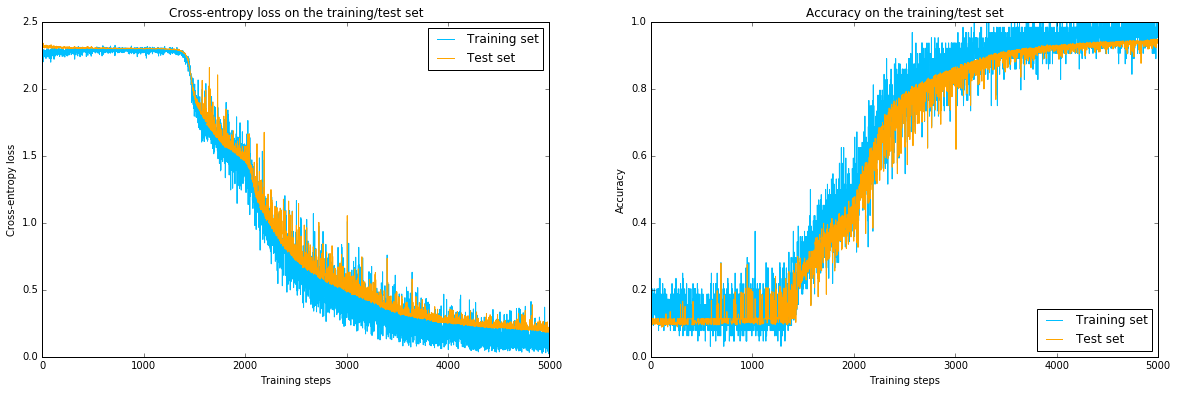

In [5]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(1, 2, 1)
plt.plot(range(1,5001), loss_tr, c='deepskyblue', label='Training set')
plt.plot(range(1,5001), loss_ts, c='orange', label='Test set')
plt.legend()
plt.title('Cross-entropy loss on the training/test set')
plt.xlabel('Training steps')
plt.ylabel('Cross-entropy loss')
plt.subplot(1, 2, 2)
plt.plot(range(1,5001), acc_tr, c='deepskyblue', label='Training set')
plt.plot(range(1,5001), acc_ts, c='orange', label='Test set')
plt.legend(loc='lower right')
plt.title('Accuracy on the training/test set')
plt.xlabel('Training steps')
plt.ylabel('Accuracy')